### Links 

Abortion Dataset: https://osf.io/duj6a

Unemployment Dataset: https://www.ers.usda.gov/data-products/county-level-data-sets/county-level-data-sets-download-data

Crime Dataset: https://linc.osbm.nc.gov/explore/dataset/state-comparison-crime-data/export/?disjunctive.area_name&disjunctive.year&disjunctive.variable


Idea, use tradingeconomics API to compare certain economic indicators with abortion?

*Note: Redo upload for crime dataset*

*Also look to eventually do correlation plot at end of project, after joining all dataframes*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

### *EDA*

In [2]:
preg_df = pd.read_csv("NationalAndStatePregnancy_PublicUse.csv")
#crime_df = pd.read_csv("state-comparison-crime-data.csv")
unemployment_df = pd.read_excel("Unemployment2023.xlsx")

In [3]:
preg_df.head()

,state,year,pregnancyratelt15,pregnancyrate1517,pregnancyrate1819,pregnancyrate1519,pregnancyratelt20,pregnancyrate2024,pregnancyrate2529,pregnancyrate3034,...,abortionstotal,birthstotal,pregnancyratetotal,birthratetotal,abortionratetotal,abortionratiototal,miscarriagestotal,pregnanciestotal,notes,versiondate
0,AL,1988,21.3,78.3,155.7,110.5,114.3,186.5,152.5,87.2,...,20100,60745,100.5,64.3,21.3,330.9,14160,95000,Abortion estimate based on the number of abort...,3 Oct 2024
1,AL,1992,23.6,76.3,173.4,116.4,120.9,184.2,155.0,87.2,...,17720,62260,97.8,64.6,18.4,284.6,14220,94200,NaN,3 Oct 2024
2,AL,1996,18.5,66.2,156.2,102.4,106.0,176.6,143.2,90.5,...,14940,60488,90.9,61.8,15.3,247.0,13590,89020,NaN,3 Oct 2024
3,AL,2000,11.9,53.7,140.8,89.8,92.1,186.8,158.7,96.1,...,13060,63299,93.1,65.2,13.5,206.3,13970,90320,NaN,3 Oct 2024
4,AL,2005,8.7,38.6,118.7,70.8,72.5,165.8,154.8,100.5,...,10840,60453,88.8,63.6,11.4,179.3,13170,84470,NaN,3 Oct 2024


In [4]:
# Processing, drop columns as needed
preg_df.drop(columns = ["notes", "versiondate"], inplace = True)

In [5]:
unemployment_df.head()

,FIPS_Code,State,Area_Name,Rural_Urban_Continuum_Code_2023,Urban_Influence_Code_2013,Metro_2023,Civilian_labor_force_2000,Employed_2000,Unemployed_2000,Unemployment_rate_2000,...,Civilian_labor_force_2022,Employed_2022,Unemployed_2022,Unemployment_rate_2022,Civilian_labor_force_2023,Employed_2023,Unemployed_2023,Unemployment_rate_2023,Median_Household_Income_2022,Med_HH_Income_Percent_of_State_Total_2022
0,0,US,United States,NaN,NaN,NaN,142601576.0,136904853.0,5696723.0,4.0,...,164341251.0,158342285.0,5998966.0,3.7,166689556.0,160623678.0,6065878.0,3.6,74755.0,NaN
1,1000,AL,Alabama,NaN,NaN,NaN,2147173.0,2047731.0,99442.0,4.6,...,2276362.0,2218627.0,57735.0,2.5,2308131.0,2250472.0,57659.0,2.5,59703.0,100.0
2,1001,AL,"Autauga County, AL",2.0,2.0,1.0,21861.0,20971.0,890.0,4.1,...,26656.0,26065.0,591.0,2.2,27000.0,26409.0,591.0,2.2,70148.0,117.5
3,1003,AL,"Baldwin County, AL",3.0,2.0,1.0,69979.0,67370.0,2609.0,3.7,...,102280.0,99930.0,2350.0,2.3,104409.0,102029.0,2380.0,2.3,71704.0,120.1
4,1005,AL,"Barbour County, AL",3.0,6.0,0.0,11449.0,10812.0,637.0,5.6,...,8139.0,7813.0,326.0,4.0,7944.0,7592.0,352.0,4.4,41151.0,68.9


In [6]:
print(f"Unemployment Shape: {unemployment_df.shape}\nPregnancy Shape: {preg_df.shape}")

Unemployment Shape: (3286, 104)
Pregnancy Shape: (1068, 102)


In [7]:
preg_years = preg_df["year"]
preg_years.sort_values()
preg_years[len(preg_years)-1]

np.int64(2020)

Pregnancy dataset goes up to 2020, unemployment dataset certainly has data for that period and beyond. EDA on both can open up possibilities. For now we can think about the period from 2010 up to 2020. 

In [8]:
working_years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
working_years_str = []
for year in working_years: working_years_str.append(str(year))

#### Pregnancy/Abortion Dataset

In [9]:
new_preg_df = preg_df.copy()

In [10]:
new_preg_df.shape

(1068, 102)

In [11]:
# Filter to only include rows within timeframe we want 
new_preg_df = new_preg_df[new_preg_df["year"].isin(working_years)]

In [12]:
print(f"New preg df shape:{new_preg_df.shape}")

New preg df shape:(572, 102)


In [13]:
new_preg_df.head()

,state,year,pregnancyratelt15,pregnancyrate1517,pregnancyrate1819,pregnancyrate1519,pregnancyratelt20,pregnancyrate2024,pregnancyrate2529,pregnancyrate3034,...,populationsource,population1544,abortionstotal,birthstotal,pregnancyratetotal,birthratetotal,abortionratetotal,abortionratiototal,miscarriagestotal,pregnanciestotal
9,AL,2010,7.4,33.9,102.7,62.8,64.2,148.8,152.4,101.8,...,SEER,960751,10030,60005,86.4,62.5,10.4,167.2,13000,83040
10,AL,2011,6.1,30.6,99.6,58.9,60.0,142.7,150.2,102.7,...,SEER,959112,9600,59301,85.2,61.8,10.0,162.0,12820,81730
11,AL,2012,5.3,26.7,97.4,55.4,56.5,134.6,147.9,104.1,...,SEER,960239,8920,58400,83.2,60.8,9.3,152.7,12570,79890
12,AL,2013,4.3,22.1,86.5,48.2,49.1,134.6,147.5,103.6,...,SEER,961481,8230,58111,81.9,60.4,8.6,141.6,12450,78780
13,AL,2014,3.6,20.8,82.3,45.3,46.0,134.4,150.9,110.2,...,SEER,960230,8310,59378,83.7,61.8,8.7,140.0,12710,80400


Can look at specific age ranges although it seems like using total ratios/stats at end of dataframe seems best to pair with other datasets. 

In [15]:
cumulative_stats = ['state', 'year', 'abortionstotal', 'birthstotal', 'pregnancyratetotal', 'birthratetotal', 'abortionratetotal',
'abortionratiototal', 'miscarriagestotal', 'pregnanciestotal']

In [16]:
cumulative_stats_preg_df = new_preg_df[cumulative_stats]
cumulative_stats_preg_df.head()

,state,year,abortionstotal,birthstotal,pregnancyratetotal,birthratetotal,abortionratetotal,abortionratiototal,miscarriagestotal,pregnanciestotal
9,AL,2010,10030,60005,86.4,62.5,10.4,167.2,13000,83040
10,AL,2011,9600,59301,85.2,61.8,10.0,162.0,12820,81730
11,AL,2012,8920,58400,83.2,60.8,9.3,152.7,12570,79890
12,AL,2013,8230,58111,81.9,60.4,8.6,141.6,12450,78780
13,AL,2014,8310,59378,83.7,61.8,8.7,140.0,12710,80400


#### Unemployment Dataset

In [62]:
new_unemployment_df = unemployment_df.copy()
new_unemployment_df.drop(columns = ["FIPS_Code", "Area_Name", "Rural_Urban_Continuum_Code_2023", 
                                    "Urban_Influence_Code_2013", "Metro_2023"], inplace = True)
new_unemployment_df.head()

,State,Civilian_labor_force_2000,Employed_2000,Unemployed_2000,Unemployment_rate_2000,Civilian_labor_force_2001,Employed_2001,Unemployed_2001,Unemployment_rate_2001,Civilian_labor_force_2002,...,Civilian_labor_force_2022,Employed_2022,Unemployed_2022,Unemployment_rate_2022,Civilian_labor_force_2023,Employed_2023,Unemployed_2023,Unemployment_rate_2023,Median_Household_Income_2022,Med_HH_Income_Percent_of_State_Total_2022
0,US,142601576.0,136904853.0,5696723.0,4.0,143786537.0,136977996.0,6808541.0,4.7,144839298.0,...,164341251.0,158342285.0,5998966.0,3.7,166689556.0,160623678.0,6065878.0,3.6,74755.0,NaN
1,AL,2147173.0,2047731.0,99442.0,4.6,2128027.0,2017467.0,110560.0,5.2,2112621.0,...,2276362.0,2218627.0,57735.0,2.5,2308131.0,2250472.0,57659.0,2.5,59703.0,100.0
2,AL,21861.0,20971.0,890.0,4.1,22081.0,21166.0,915.0,4.1,22161.0,...,26656.0,26065.0,591.0,2.2,27000.0,26409.0,591.0,2.2,70148.0,117.5
3,AL,69979.0,67370.0,2609.0,3.7,69569.0,66545.0,3024.0,4.3,69379.0,...,102280.0,99930.0,2350.0,2.3,104409.0,102029.0,2380.0,2.3,71704.0,120.1
4,AL,11449.0,10812.0,637.0,5.6,11324.0,10468.0,856.0,7.6,11006.0,...,8139.0,7813.0,326.0,4.0,7944.0,7592.0,352.0,4.4,41151.0,68.9


In [63]:
new_unemployment_df.drop(labels = 0, inplace = True)

In [64]:
print(f"New unemployment df shape: {new_unemployment_df.shape}")

New unemployment df shape: (3285, 99)


In [65]:
col_list = [col.split(sep = '_') for col in new_unemployment_df.columns]
col_list = [col for col in col_list if col[-1] in working_years_str]

In [66]:
filtered_cols_unemployment = ['State']
for col_array in col_list:
    col = col_array[0]
    for i in range(1,len(col_array)):
        col = col + '_' + col_array[i]
    filtered_cols_unemployment.append(col)



In [68]:
filtered_unemployment_df = new_unemployment_df[filtered_cols_unemployment]

In [69]:
filtered_unemployment_df.head()

,State,Civilian_labor_force_2010,Employed_2010,Unemployed_2010,Unemployment_rate_2010,Civilian_labor_force_2011,Employed_2011,Unemployed_2011,Unemployment_rate_2011,Civilian_labor_force_2012,...,Unemployed_2018,Unemployment_rate_2018,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020
1,AL,2197028.0,1968824.0,228204.0,10.4,2202337.0,1991379.0,210958.0,9.6,2178508.0,...,87839.0,3.9,2271835.0,2199379.0,72456.0,3.2,2263144.0,2118600.0,144544.0,6.4
2,AL,25749.0,23481.0,2268.0,8.8,25845.0,23688.0,2157.0,8.3,25762.0,...,956.0,3.6,26683.0,25914.0,769.0,2.9,26350.0,24955.0,1395.0,5.3
3,AL,83551.0,75283.0,8268.0,9.9,85077.0,77459.0,7618.0,9.0,84507.0,...,3501.0,3.6,98917.0,96023.0,2894.0,2.9,98695.0,92639.0,6056.0,6.1
4,AL,10219.0,8978.0,1241.0,12.1,9843.0,8716.0,1127.0,11.4,9377.0,...,437.0,5.1,8637.0,8290.0,347.0,4.0,8659.0,7995.0,664.0,7.7
5,AL,8936.0,7931.0,1005.0,11.2,8932.0,8000.0,932.0,10.4,8808.0,...,346.0,4.0,8771.0,8486.0,285.0,3.2,8692.0,8063.0,629.0,7.2


In [70]:
filtered_unemployment_cols = filtered_unemployment_df.columns

In [ ]:
# use sum here because original dataset had data by region within each state
unemployment_df_grouped = filtered_unemployment_df.groupby('State').agg('sum')

In [72]:
unemployment_df_grouped.shape

(52, 44)

In [73]:
unemployment_df_grouped.head()

,Civilian_labor_force_2010,Employed_2010,Unemployed_2010,Unemployment_rate_2010,Civilian_labor_force_2011,Employed_2011,Unemployed_2011,Unemployment_rate_2011,Civilian_labor_force_2012,Employed_2012,...,Unemployed_2018,Unemployment_rate_2018,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020
State,,,,,,,,,,,,,,,,,,,,,
AK,723415.0,664370.0,59045.0,320.3,729204.0,672629.0,56575.0,326.0,728308.0,675670.0,...,42860.0,236.5,704059.0,664395.0,39664.0,228.6,693107.0,635357.0,57750.0,319.6
AL,4394063.0,3937649.0,456414.0,824.5,4404678.0,3982761.0,421917.0,755.2,4357027.0,4001702.0,...,175682.0,303.0,4543674.0,4398760.0,144914.0,247.9,4526294.0,4237203.0,289091.0,464.4
AR,2707272.0,2494117.0,213155.0,663.2,2715642.0,2500863.0,214779.0,671.1,2699776.0,2503762.0,...,98108.0,316.6,2706351.0,2611718.0,94633.0,312.3,2681116.0,2515898.0,165218.0,489.9
AZ,6192635.0,5554809.0,637826.0,205.1,6103875.0,5527521.0,576354.0,191.7,6108687.0,5599268.0,...,319416.0,104.4,6864799.0,6535094.0,329705.0,103.1,6942677.0,6400438.0,542239.0,141.1
CA,36741080.0,32156913.0,4584167.0,832.3,36813515.0,32441206.0,4372309.0,803.9,36969771.0,33082084.0,...,1639192.0,312.8,38770527.0,37179101.0,1591426.0,305.9,37917212.0,34074073.0,3843139.0,584.7


In [74]:
unemployment_df_grouped.reset_index(inplace = True)
unemployment_df_grouped.head()

,State,Civilian_labor_force_2010,Employed_2010,Unemployed_2010,Unemployment_rate_2010,Civilian_labor_force_2011,Employed_2011,Unemployed_2011,Unemployment_rate_2011,Civilian_labor_force_2012,...,Unemployed_2018,Unemployment_rate_2018,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020
0,AK,723415.0,664370.0,59045.0,320.3,729204.0,672629.0,56575.0,326.0,728308.0,...,42860.0,236.5,704059.0,664395.0,39664.0,228.6,693107.0,635357.0,57750.0,319.6
1,AL,4394063.0,3937649.0,456414.0,824.5,4404678.0,3982761.0,421917.0,755.2,4357027.0,...,175682.0,303.0,4543674.0,4398760.0,144914.0,247.9,4526294.0,4237203.0,289091.0,464.4
2,AR,2707272.0,2494117.0,213155.0,663.2,2715642.0,2500863.0,214779.0,671.1,2699776.0,...,98108.0,316.6,2706351.0,2611718.0,94633.0,312.3,2681116.0,2515898.0,165218.0,489.9
3,AZ,6192635.0,5554809.0,637826.0,205.1,6103875.0,5527521.0,576354.0,191.7,6108687.0,...,319416.0,104.4,6864799.0,6535094.0,329705.0,103.1,6942677.0,6400438.0,542239.0,141.1
4,CA,36741080.0,32156913.0,4584167.0,832.3,36813515.0,32441206.0,4372309.0,803.9,36969771.0,...,1639192.0,312.8,38770527.0,37179101.0,1591426.0,305.9,37917212.0,34074073.0,3843139.0,584.7


Need to first make 11 different copies of each state in order to label accordingly with years. 

In [75]:
copy_row = pd.DataFrame(unemployment_df_grouped.loc[0])
copy_row.shape

(45, 1)

In [76]:
copy_row = copy_row.T
copy_row.shape

(1, 45)

In [77]:
employ_test_df = unemployment_df_grouped.copy()

In [78]:
employ_test_df.shape

(52, 45)

In [79]:
copied_rows = pd.concat([copy_row]*10, ignore_index = True)

In [80]:
employ_test_df = pd.concat([employ_test_df, copied_rows], ignore_index = True)

In [81]:
employ_test_df.shape

(62, 45)

In [82]:
test_df_ak = employ_test_df[employ_test_df['State']=='AK']

In [108]:
test_df_ak

,State,Civilian_labor_force_2010,Employed_2010,Unemployed_2010,Unemployment_rate_2010,Civilian_labor_force_2011,Employed_2011,Unemployed_2011,Unemployment_rate_2011,Civilian_labor_force_2012,...,Unemployment_rate_2018,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Year
0,AK,723415.0,664370.0,59045.0,320.3,729204.0,672629.0,56575.0,326.0,728308.0,...,236.5,704059.0,664395.0,39664.0,228.6,693107.0,635357.0,57750.0,319.6,2010
52,AK,723415.0,664370.0,59045.0,320.3,729204.0,672629.0,56575.0,326.0,728308.0,...,236.5,704059.0,664395.0,39664.0,228.6,693107.0,635357.0,57750.0,319.6,2011
53,AK,723415.0,664370.0,59045.0,320.3,729204.0,672629.0,56575.0,326.0,728308.0,...,236.5,704059.0,664395.0,39664.0,228.6,693107.0,635357.0,57750.0,319.6,2012
54,AK,723415.0,664370.0,59045.0,320.3,729204.0,672629.0,56575.0,326.0,728308.0,...,236.5,704059.0,664395.0,39664.0,228.6,693107.0,635357.0,57750.0,319.6,2013
55,AK,723415.0,664370.0,59045.0,320.3,729204.0,672629.0,56575.0,326.0,728308.0,...,236.5,704059.0,664395.0,39664.0,228.6,693107.0,635357.0,57750.0,319.6,2014
56,AK,723415.0,664370.0,59045.0,320.3,729204.0,672629.0,56575.0,326.0,728308.0,...,236.5,704059.0,664395.0,39664.0,228.6,693107.0,635357.0,57750.0,319.6,2015
57,AK,723415.0,664370.0,59045.0,320.3,729204.0,672629.0,56575.0,326.0,728308.0,...,236.5,704059.0,664395.0,39664.0,228.6,693107.0,635357.0,57750.0,319.6,2016
58,AK,723415.0,664370.0,59045.0,320.3,729204.0,672629.0,56575.0,326.0,728308.0,...,236.5,704059.0,664395.0,39664.0,228.6,693107.0,635357.0,57750.0,319.6,2017
59,AK,723415.0,664370.0,59045.0,320.3,729204.0,672629.0,56575.0,326.0,728308.0,...,236.5,704059.0,664395.0,39664.0,228.6,693107.0,635357.0,57750.0,319.6,2018
60,AK,723415.0,664370.0,59045.0,320.3,729204.0,672629.0,56575.0,326.0,728308.0,...,236.5,704059.0,664395.0,39664.0,228.6,693107.0,635357.0,57750.0,319.6,2019


In [84]:
test_df_ak.shape

(11, 45)

In [85]:
len(working_years)

11

In [86]:
test_df_ak['Year'] = working_years
test_df_ak.shape

C:\Users\joshf\AppData\Local\Temp\ipykernel_40748\445893112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df_ak['Year'] = working_years


(11, 46)

In [87]:
test_df_ak.head()

,State,Civilian_labor_force_2010,Employed_2010,Unemployed_2010,Unemployment_rate_2010,Civilian_labor_force_2011,Employed_2011,Unemployed_2011,Unemployment_rate_2011,Civilian_labor_force_2012,...,Unemployment_rate_2018,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Year
0,AK,723415.0,664370.0,59045.0,320.3,729204.0,672629.0,56575.0,326.0,728308.0,...,236.5,704059.0,664395.0,39664.0,228.6,693107.0,635357.0,57750.0,319.6,2010
52,AK,723415.0,664370.0,59045.0,320.3,729204.0,672629.0,56575.0,326.0,728308.0,...,236.5,704059.0,664395.0,39664.0,228.6,693107.0,635357.0,57750.0,319.6,2011
53,AK,723415.0,664370.0,59045.0,320.3,729204.0,672629.0,56575.0,326.0,728308.0,...,236.5,704059.0,664395.0,39664.0,228.6,693107.0,635357.0,57750.0,319.6,2012
54,AK,723415.0,664370.0,59045.0,320.3,729204.0,672629.0,56575.0,326.0,728308.0,...,236.5,704059.0,664395.0,39664.0,228.6,693107.0,635357.0,57750.0,319.6,2013
55,AK,723415.0,664370.0,59045.0,320.3,729204.0,672629.0,56575.0,326.0,728308.0,...,236.5,704059.0,664395.0,39664.0,228.6,693107.0,635357.0,57750.0,319.6,2014


In [88]:
# just create 11 instances of rows and add them together at end

# define one row
test_row_ak = pd.DataFrame(test_df_ak.iloc[0,:]).T

columns = test_row_ak.columns

# split columns 
test_row_columns = []
for column in columns: 
    x = column.split(sep='_')
    test_row_columns.append(x)

test_row_columns = [x for x in test_row_columns if x[-1] == '2010']

new_columns_ak_row = []

for x in test_row_columns:
    new = '_'.join(x)
    new_columns_ak_row.append(new)

test_row_ak = test_row_ak[new_columns_ak_row]
test_row_ak

,Civilian_labor_force_2010,Employed_2010,Unemployed_2010,Unemployment_rate_2010
0,723415.0,664370.0,59045.0,320.3


In [89]:
unemployment_rearrange = unemployment_df_grouped.copy()

In [90]:
states = unemployment_rearrange['State']
unemployment_rearrange.drop(columns = ['State'], inplace = True)

In [91]:
for col in unemployment_rearrange.columns: 
    col = col.split(sep = '_')[-1]
    unemployment_rearrange['Year'] = col

In [92]:
unemployment_rearrange.head()

,Civilian_labor_force_2010,Employed_2010,Unemployed_2010,Unemployment_rate_2010,Civilian_labor_force_2011,Employed_2011,Unemployed_2011,Unemployment_rate_2011,Civilian_labor_force_2012,Employed_2012,...,Unemployment_rate_2018,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Year
0,723415.0,664370.0,59045.0,320.3,729204.0,672629.0,56575.0,326.0,728308.0,675670.0,...,236.5,704059.0,664395.0,39664.0,228.6,693107.0,635357.0,57750.0,319.6,2020
1,4394063.0,3937649.0,456414.0,824.5,4404678.0,3982761.0,421917.0,755.2,4357027.0,4001702.0,...,303.0,4543674.0,4398760.0,144914.0,247.9,4526294.0,4237203.0,289091.0,464.4,2020
2,2707272.0,2494117.0,213155.0,663.2,2715642.0,2500863.0,214779.0,671.1,2699776.0,2503762.0,...,316.6,2706351.0,2611718.0,94633.0,312.3,2681116.0,2515898.0,165218.0,489.9,2020
3,6192635.0,5554809.0,637826.0,205.1,6103875.0,5527521.0,576354.0,191.7,6108687.0,5599268.0,...,104.4,6864799.0,6535094.0,329705.0,103.1,6942677.0,6400438.0,542239.0,141.1,2020
4,36741080.0,32156913.0,4584167.0,832.3,36813515.0,32441206.0,4372309.0,803.9,36969771.0,33082084.0,...,312.8,38770527.0,37179101.0,1591426.0,305.9,37917212.0,34074073.0,3843139.0,584.7,2020


#### Final DFs

In [93]:
unemployment_df_grouped.head()

,State,Civilian_labor_force_2010,Employed_2010,Unemployed_2010,Unemployment_rate_2010,Civilian_labor_force_2011,Employed_2011,Unemployed_2011,Unemployment_rate_2011,Civilian_labor_force_2012,...,Unemployed_2018,Unemployment_rate_2018,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020
0,AK,723415.0,664370.0,59045.0,320.3,729204.0,672629.0,56575.0,326.0,728308.0,...,42860.0,236.5,704059.0,664395.0,39664.0,228.6,693107.0,635357.0,57750.0,319.6
1,AL,4394063.0,3937649.0,456414.0,824.5,4404678.0,3982761.0,421917.0,755.2,4357027.0,...,175682.0,303.0,4543674.0,4398760.0,144914.0,247.9,4526294.0,4237203.0,289091.0,464.4
2,AR,2707272.0,2494117.0,213155.0,663.2,2715642.0,2500863.0,214779.0,671.1,2699776.0,...,98108.0,316.6,2706351.0,2611718.0,94633.0,312.3,2681116.0,2515898.0,165218.0,489.9
3,AZ,6192635.0,5554809.0,637826.0,205.1,6103875.0,5527521.0,576354.0,191.7,6108687.0,...,319416.0,104.4,6864799.0,6535094.0,329705.0,103.1,6942677.0,6400438.0,542239.0,141.1
4,CA,36741080.0,32156913.0,4584167.0,832.3,36813515.0,32441206.0,4372309.0,803.9,36969771.0,...,1639192.0,312.8,38770527.0,37179101.0,1591426.0,305.9,37917212.0,34074073.0,3843139.0,584.7


In [94]:
print(f"unemployment_df shape: {unemployment_df_grouped.shape}")

unemployment_df shape: (52, 45)


In [95]:
cumulative_stats_preg_df.head()

,state,year,abortionstotal,birthstotal,pregnancyratetotal,birthratetotal,abortionratetotal,abortionratiototal,miscarriagestotal,pregnanciestotal
9,AL,2010,10030,60005,86.4,62.5,10.4,167.2,13000,83040
10,AL,2011,9600,59301,85.2,61.8,10.0,162.0,12820,81730
11,AL,2012,8920,58400,83.2,60.8,9.3,152.7,12570,79890
12,AL,2013,8230,58111,81.9,60.4,8.6,141.6,12450,78780
13,AL,2014,8310,59378,83.7,61.8,8.7,140.0,12710,80400


Might not be a need to join dataframes, run ridge/lasso regression 
group by state and take avg of preg_df for x, see if correlates for each column in unemployment

In [96]:
preg_avgs_state = cumulative_stats_preg_df.groupby('state').mean().reset_index()
preg_avgs_state.drop(columns = ['state','year'], inplace = True)
preg_avgs_state.head()

,abortionstotal,birthstotal,pregnancyratetotal,birthratetotal,abortionratetotal,abortionratiototal,miscarriagestotal,pregnanciestotal
0,1638.181818,10842.272727,101.472727,74.272727,11.227273,150.554545,2332.727273,14811.818182
1,8519.090909,58784.000000,83.581818,61.481818,8.909091,144.918182,12608.181818,79911.818182
2,4368.181818,37738.363636,86.872727,65.463636,7.563636,115.709091,7983.636364,50090.909091
3,14130.000000,83558.636364,87.145455,62.881818,10.636364,169.190909,18124.545455,115810.909091
4,156029.090909,478852.727273,93.209091,59.818182,19.500000,325.881818,111370.909091,746254.545455


In [97]:
unemployment_model = unemployment_df_grouped.drop(columns = 'State')
unemployment_model.head()

,Civilian_labor_force_2010,Employed_2010,Unemployed_2010,Unemployment_rate_2010,Civilian_labor_force_2011,Employed_2011,Unemployed_2011,Unemployment_rate_2011,Civilian_labor_force_2012,Employed_2012,...,Unemployed_2018,Unemployment_rate_2018,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020
0,723415.0,664370.0,59045.0,320.3,729204.0,672629.0,56575.0,326.0,728308.0,675670.0,...,42860.0,236.5,704059.0,664395.0,39664.0,228.6,693107.0,635357.0,57750.0,319.6
1,4394063.0,3937649.0,456414.0,824.5,4404678.0,3982761.0,421917.0,755.2,4357027.0,4001702.0,...,175682.0,303.0,4543674.0,4398760.0,144914.0,247.9,4526294.0,4237203.0,289091.0,464.4
2,2707272.0,2494117.0,213155.0,663.2,2715642.0,2500863.0,214779.0,671.1,2699776.0,2503762.0,...,98108.0,316.6,2706351.0,2611718.0,94633.0,312.3,2681116.0,2515898.0,165218.0,489.9
3,6192635.0,5554809.0,637826.0,205.1,6103875.0,5527521.0,576354.0,191.7,6108687.0,5599268.0,...,319416.0,104.4,6864799.0,6535094.0,329705.0,103.1,6942677.0,6400438.0,542239.0,141.1
4,36741080.0,32156913.0,4584167.0,832.3,36813515.0,32441206.0,4372309.0,803.9,36969771.0,33082084.0,...,1639192.0,312.8,38770527.0,37179101.0,1591426.0,305.9,37917212.0,34074073.0,3843139.0,584.7


In [98]:
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

Run model where X can be entire dataframe and y is selected column from the other 

In [99]:
X = preg_avgs_state

In [100]:
lasso_model = linear_model.LassoCV(n_jobs = 3)

In [101]:
lasso_scores = {}
for col in unemployment_model.columns:
    y = unemployment_model[col]
    #X_train, X_test, y_train, y_test = train_test_split(X,y)
    model = lasso_model.fit(X,y)
    lasso_scores[col] = (model.score(X,y))

C:\Users\joshf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2551.2099440982565, tolerance: 844.9101829756098
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\joshf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1850.8704273672774, tolerance: 949.7316972195123
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\joshf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWar

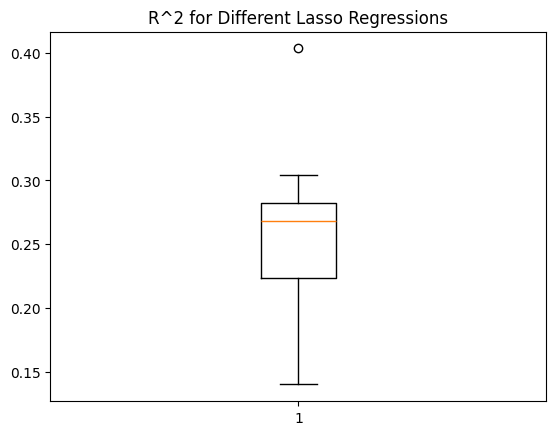

In [102]:
plt.boxplot(lasso_scores.values())
plt.title("R^2 for Different Lasso Regressions")
plt.show()

In [103]:
ridge_model = linear_model.RidgeCV()

In [104]:
ridge_scores = {}
for col in unemployment_model.columns:
    y = unemployment_model[col]
    model = ridge_model.fit(X,y)
    ridge_scores[col] = (model.score(X,y))

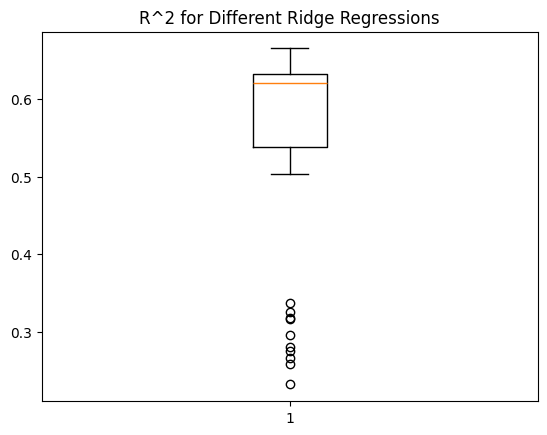

In [105]:
plt.boxplot(ridge_scores.values())
plt.title("R^2 for Different Ridge Regressions")
plt.show()

Can see ridge is a better fit with some higher R^2, examine further

In [106]:
ridge_df = pd.DataFrame({'cols' : ridge_scores.keys(),
                         'scores' : ridge_scores.values()
                         })

In [107]:
ridge_df.sort_values(by = 'scores', ascending = False, inplace = True)
ridge_df.head(5)

,cols,scores
42,Unemployed_2020,0.665371
17,Employed_2014,0.643604
33,Employed_2018,0.642326
40,Civilian_labor_force_2020,0.639236
28,Civilian_labor_force_2017,0.637902


can see here that there is not much of a strong correlation, can fix analysis another time

See if pregnancy data by age for x years indicates anything about unemployment dataset

In [115]:
preg_df_ages = new_preg_df.drop(columns = cumulative_stats)

In [116]:
preg_df_ages.describe()

,pregnancyratelt15,pregnancyrate1517,pregnancyrate1819,pregnancyrate1519,pregnancyratelt20,pregnancyrate2024,pregnancyrate2529,pregnancyrate3034,pregnancyrate3539,pregnancyrate40plus,...,population1517,population1819,population1519,populationlt20,population2024,population2529,population3034,population3539,population40plus,population1544
count,567.000000,568.000000,568.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,...,5.720000e+02,5.720000e+02,5.720000e+02,5.720000e+02,5.720000e+02,5.720000e+02,5.720000e+02,5.720000e+02,5.720000e+02,5.720000e+02
mean,4.244092,17.791901,66.731866,37.655769,38.441259,119.227448,149.227273,131.375350,65.342832,15.142832,...,2.369962e+05,1.620426e+05,3.990388e+05,3.990388e+05,4.171214e+05,4.238462e+05,4.118607e+05,3.957541e+05,3.934103e+05,2.441031e+06
std,3.978075,8.623873,21.963784,13.206031,13.449700,23.321694,19.547328,16.639378,14.612677,5.105034,...,8.418300e+05,5.754226e+05,1.417173e+06,1.417173e+06,1.481527e+06,1.507601e+06,1.464465e+06,1.407331e+06,1.398128e+06,8.672469e+06
min,0.700000,4.900000,19.800000,12.300000,13.000000,53.800000,74.300000,92.200000,36.700000,6.400000,...,7.749000e+03,6.773000e+03,1.733100e+04,1.733100e+04,1.784600e+04,1.743500e+04,1.733400e+04,1.588800e+04,1.584700e+04,1.067090e+05
25%,2.300000,12.100000,51.200000,28.175000,28.900000,104.500000,140.100000,119.400000,55.075000,11.500000,...,3.328350e+04,2.199325e+04,5.574350e+04,5.574350e+04,5.505225e+04,5.355950e+04,5.326675e+04,5.414650e+04,5.354325e+04,3.269448e+05
50%,3.400000,15.750000,64.150000,35.400000,35.950000,119.700000,150.100000,131.400000,64.400000,14.300000,...,8.592300e+04,5.645050e+04,1.435010e+05,1.435010e+05,1.526290e+05,1.523445e+05,1.483100e+05,1.426050e+05,1.406800e+05,8.888550e+05
75%,5.000000,21.500000,81.225000,45.700000,46.625000,136.075000,158.625000,142.300000,72.300000,17.500000,...,1.425385e+05,1.052962e+05,2.423310e+05,2.423310e+05,2.514925e+05,2.733132e+05,2.759218e+05,2.638215e+05,2.486278e+05,1.567437e+06
max,37.000000,80.300000,129.200000,90.600000,92.800000,191.000000,208.700000,185.200000,107.400000,35.400000,...,6.282174e+06,4.421418e+06,1.070359e+07,1.070359e+07,1.115712e+07,1.153582e+07,1.126915e+07,1.089072e+07,1.057759e+07,6.454383e+07


<Axes: >

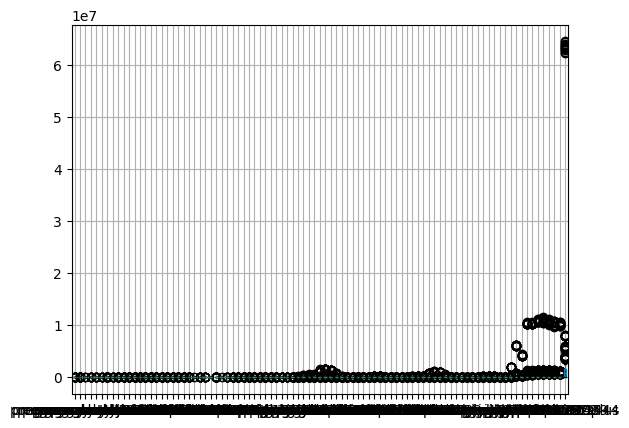

In [127]:
preg_df_ages.boxplot()